## **Entrega 3 - ProyectoDS_ParteI**

### **Abstract**

En los últimos años, la energía solar fotovoltaica ha ganado popularidad debido no solo al aumento de la eficiencia de los paneles solares sino a la reducción de los costos asociados. Sin embargo, la ineherente naturaleza intermitente e incontrolable de la energía solar
genera inestabilidad en los sistemas fotovoltaicos que suministran
energía a la red, dificultando, en muchas ocasiones, su uso masivo. En este escenario, es imprescindible contar con técnicas fiables que permitan predecir la potencia generada por las celdas fotovoltaicas. En este trabajo, distintas técnicas basadas en machine learning serán utilizadas para predecir la potencia generada por las celdas fotovoltaicas a partir de datos climáticos históricos. 
En primer lugar, se tratarán los datos y se realizará un análisis exploratorio de mismos (EDA) para interpretarlos y establecer relaciones significativas entre ellos. Una vez hecho esto, se seleccionarán las variables más relevantes para la predicción de la potencia generada, así como los métodos de aprendizaje adecuados para la aplicación. Luego, se entrenarán, validarán y testearán los modelos elegidos, utilizando los datos apartados para tal fin. Finalmente, se calculará la precisión obtenida con cada uno de los modelos propuestos, se compararán y se seleccionará el de mejor rendimiento. 

### **Audiencia**
El análisis de los datos, el modelo predictivo desarrollado, sus resultados y las conclusiones obtenidas pueden ser información útil para distintas partes interesadas en el campo de la energía solar fotovoltaica. Por un lado, potenciales inversores pueden usar la información para decidir si la locación es adecuada para futuras instalaciones y/o ampliaciones de los paneles existentes. Por el otro lado, empresas de energía pueden usar las predicciones para diseñar un eficiente manejo de sus redes de distribución local.



### **Objetivos**
El principal objetivo de este proyecto es desarrollar un modelo de Data Science para predecir la potencia fotovoltaica generada por celdas solares a partir de datos climáticos históricos. Para esto, se persiguen los siguientes objetivos particulares:

- Entender el problema e identificar los elementos a ser considerados para el planteamiento del modelo predictivo.
- Pre-procesar los datos.
- Describir, interpretar, analizar y establecer relaciones significativas entre los datos mediante un análisis exploratorio de los datos (EDA).
- Seleccionar el/los métodos de machine learning que mejor se ajusten a las características del problema a resolver.
- Seleccionar las variables relevantes para el/los modelos elegidos.
- Entrenar y validar el/los modelos propuestos. 
- Evaluar los indicadores de desempeño predictivo del/de los modelos entrenados y realizar optimizaciones.
- En caso de haber desarrolaldo más de un modelo, comparar sus eficiencias y seleccionar el mejor de ellos. 
- Construir una presentación ejecutiva mostrando los resultados del proyecto. 



### **Principales preguntas e hipótesis** 
La pregunta que intentaremos resolver es la siguiente: ¿Cuál será la potencia fotovoltaica generada por un conjunto de celdas solares en un determinado período de tiempo? 
La principal hipótesis es que las variables climáticas históricas influyen en la generación de potencia fotovoltaica de las celdas solares. 
Es lógico pensar que las variables climáticas van a influir sobre la potencia fotovoltaica generada por las celdas solares. Sin embargo, esta premisa tendrá que ser comprobada a partir del análisis de los datos, así como en qué medida son relevantes y cuáles lo son más. 



### **PARTE I: Análisis de los datos**


#### Carga de librerías

In [97]:
import pandas as pd 
import numpy as np 
import os 
from os import listdir
from os.path import isfile, join 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors

#### Descripción cualitativa de los datos

Los datos fueron obtenidos de https://www.kaggle.com/. El archivo csv contiene 16 columnas. La descripción de cada columna es la siguiente:
- Day or Year: Día del año (0-365)
- Year: Año
- Mounth: Mes
- Day: Día
- First Hour of Period: Hora del día
- is day light: Si hay luz solar (Bool)
- Distance to solar noon: distancia al mediodia solar
- Average temperature (day): Temperatura promedio
- Average wind direction (day): Promedio de direccion del viento
- Average wind speed (day): Pomedio de velocidad del viento
- Sky Cover: Cobertura del cielo
- Visibility: Visibilidad
- Relative Humedity: Humedad Relativa
- Average Wind Speed Period: Promedio de velocidad del viento en ese periodo
- Average Barometric presure: Promedio de presion atmosferica
- Power Generated: Potencia generada


#### Carga de los datos

In [98]:
# Cargamos y presentamos los datos
df_DataSet2 = pd.read_csv('/workspaces/Coder/data/raw/Energia_Solar.csv')
df_DataSet2

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


#### Información preliminar de los datos

In [99]:
# Información del dataset
df_DataSet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

A partir de la carga de los datos y de la observación de la información preliminar del dataset, tenemos lo que sigue:

**Valores nulos**

El dataset no presenta valores nulos. 

**Tipos de datos**
- Variable booleana: Is Day Light  
- Variables categóricas: Year, Month, Day, Day of Year, First Hour of Period. 
- Variables numéricas: 
    - Variables continuas: Distance to Solar Noon, Average Temperature (Day), Average Wind Direction (Day), Average Wind Speed (Day),  Relative Humidity, Average Wind Speed (Period), Average Barometric Pressure (Period), Power Generated    
    - Variables discretas: Visibilidad (valores de 1 a 10 (con intervalo de 1)), Sky Cover (valores de 1 a 4 (con intervalo 1))

Las variables numéricas corresponden a datos climáticos y a la potencia fotovoltaica generada. Es de esperar que estos datos climáticos nos servan para estimar la cantidad de potencia fotovoltaica generada por las celdas solares. 

In [100]:
# Renombramos las columnas para facilitar su manipulación
df_DataSet2 = df_DataSet2.rename(columns = {'Day of Year':'day_year', 'Year':'year', 'Month':'month', 'Day':'day', 
'First Hour of Period':'first_hour_period','Is Daylight':'is_daylight', 'Distance to Solar Noon':'dist_solar_noon',
'Average Temperature (Day)':'avg_temp_day', 'Average Wind Direction (Day)':'avg_wd_day', 'Average Wind Speed (Day)':'avg_ws_day', 
'Sky Cover':'sky_over', 'Visibility':'visibility', 'Relative Humidity':'rel_hum', 'Average Wind Speed (Period)':'avg_ws_period',      
'Average Barometric Pressure (Period)':'avg_pres_period', 'Power Generated':'power_gen'})

#### Descripción de los datos (medidas de tendencia central)  

In [101]:
# Realizamos un describe para analizar las medida de tendencia central de los datos
df_DataSet2.iloc[:,6:16].describe().T

,count,mean,std,min,25%,50%,75%,max
dist_solar_noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
avg_temp_day,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
avg_wd_day,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
avg_ws_day,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky_over,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
rel_hum,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
avg_ws_period,2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
avg_pres_period,2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power_gen,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


#### Análisis descriptivo de los Datos (EDA)

##### 1. Análisis de la distribución de la potencia generada

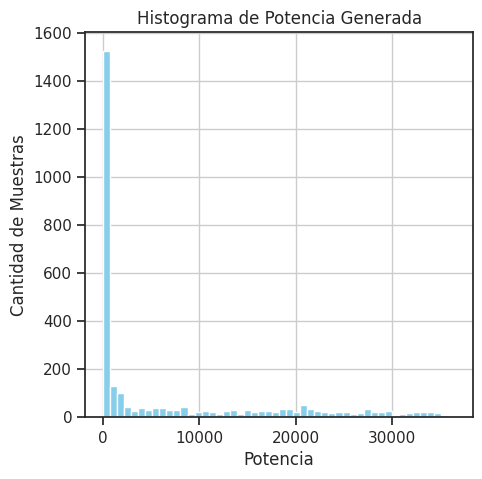

In [102]:
# estudiamos la distribución de la potencia generada (histograma)
fig, ax = plt.subplots(figsize=(5,5))
df_DataSet2.loc[:,'power_gen'].hist(bins=50,figsize=(5,5), facecolor='skyblue')
ax.set_title('Histograma de Potencia Generada')
ax.set_xlabel('Potencia')
ax.set_ylabel('Cantidad de Muestras')
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/01_mpl_Hist_Pot.png')

Podemos observar que la mayoría de las muestras se encuentran con potencia cero o muy baja potencia generada. Realizamos un boxplot de la potencia generada para observar la distribución de sus cuartiles e identificar outliers.

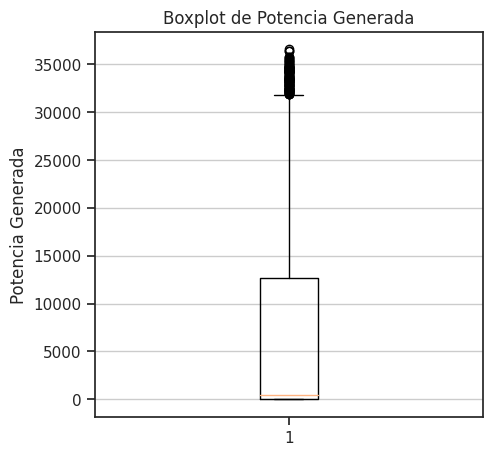

In [103]:
# estudiamos la distribución de la potencia generada a partir de un boxplot 
fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot(x=df_DataSet2["power_gen"],)
ax.yaxis.grid(True)
ax.set_title('Boxplot de Potencia Generada')
ax.set_ylabel('Potencia Generada')
plt.show()
fig.savefig('../Entregas Coder/Figuras/02_mpl_BoxPlot_Pot.png')

Nuevamente, observamos que la mediana de la potencia generada se encuentra cercana al cero y los valores por encima de 32000 los considera outliers. Estudiaremos qué sucede con la potencia generada usando la luz solar como filtro. Es decir, analizaremos la potencia generada en presencia y ausencia de luz solar, is_daylight = True y is_daylight = False, respectivamente.

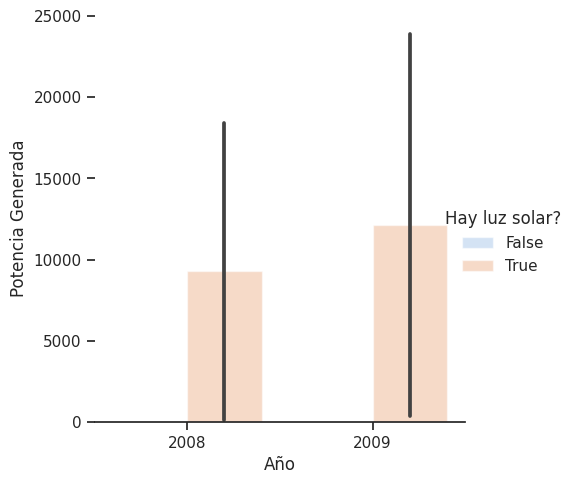

In [104]:
#Gráfico de barras con la potencia generada cuando hay luz solar y cuando no.
g = sns.catplot(
    data=df_DataSet2, kind="bar",
    x="year", y="power_gen", hue="is_daylight",
    errorbar="sd", palette="pastel", alpha=.5, height=5, color = 'b'
)
g.despine(left=True)
g.set_axis_labels("Año", "Potencia Generada")
g.legend.set_title("Hay luz solar?")
g.savefig('../Entregas Coder/Figuras/01_sn_Barchar_Pot.png')

Como vemos en la gráfico de barras, la potencia generada cuando no hay luz solar es cero. Por lo tanto, para estimar la potencia generada 
se utilizarán las variables solo en el caso de que haya luz solar. Es decir, filtraremos cada una de las variables por la variable categórica is_daylight = True. De esta manera, podremos predecir la potencia generada durante las horas de luz solar, ya que durante las restantes, la potencia será cero. 

In [105]:
# nos quedamos con los datos correspondientes al período de luz solar
df_DataSet2_dia = df_DataSet2.query('is_daylight == True')
df_DataSet2_dia.describe().T

,count,mean,std,min,25%,50%,75%,max
day_year,1805.0,178.772853,101.128628,1.000000,94.000000,176.000000,263.000000,366.000000
year,1805.0,2008.698061,0.459226,2008.000000,2008.000000,2009.000000,2009.000000,2009.000000
month,1805.0,6.377285,3.301890,1.000000,4.000000,6.000000,9.000000,12.000000
day,1805.0,15.754571,8.786273,1.000000,8.000000,16.000000,23.000000,31.000000
first_hour_period,1805.0,12.434903,4.357474,4.000000,10.000000,13.000000,16.000000,19.000000
dist_solar_noon,1805.0,0.309599,0.177346,0.050401,0.151584,0.305898,0.447496,0.775717
avg_temp_day,1805.0,58.829917,6.748194,42.000000,54.000000,59.000000,63.000000,78.000000
avg_wd_day,1805.0,25.259280,6.593715,1.000000,26.000000,27.000000,29.000000,36.000000
avg_ws_day,1805.0,10.324875,4.780630,1.100000,6.900000,10.300000,13.300000,26.600000
sky_over,1805.0,2.019391,1.347643,0.000000,1.000000,2.000000,3.000000,4.000000


Al quitar los datos registrados durante las horas en donde no hay luz solar, conservamos 1805 muestras, por lo que seguimos teniendo datos suficientes para hacer le estimación de la potencoia generada durante el día.
También vemos que avg_ws_period posee 1804 muestras, lo que nos indica que tiene una fila con NAN que deberemos solucionar.

Estudiamos la potencia generada durante las horas de luz solar:

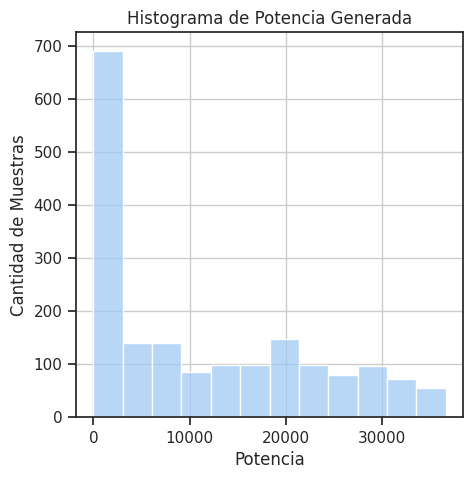

In [106]:
# estudiamos la distribución de la potencia generada durante las horas de luz solar
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.set_theme(style="ticks", palette="pastel")
#sns.displot(x = 'power_gen', data = df_DataSet2_dia)
sns.histplot(x = 'power_gen', data = df_DataSet2_dia, ax=ax, color = 'b')
ax.set_title('Histograma de Potencia Generada')
ax.set_xlabel('Potencia')
ax.set_ylabel('Cantidad de Muestras')
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/02_sn_Hist_Pot.png')

Si bien la distribución se modificó, la tendencia sigue estando hacia los valores bajos de potencia.  

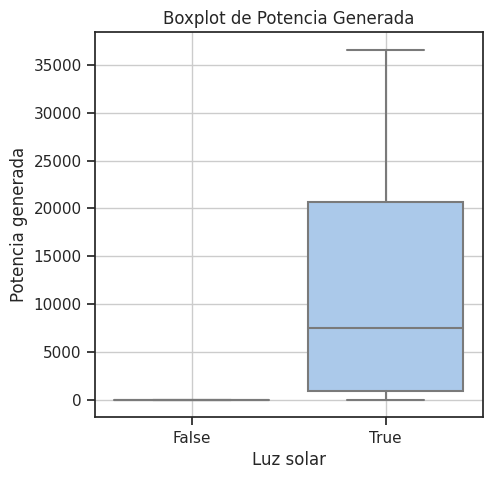

In [107]:
#volvemos a analizar el boxplot, ahora con la potencia genereada solo durante la presencia de luz solar
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x = 'is_daylight', data = df_DataSet2, color = 'b', ax=ax)
ax.set_xlabel('Luz solar')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada')
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/03_sn_BoxPlot_Pot.png')

Como observamos, la mediana de potencia aumentó de manera considerable, y ya no consideran como outliers los valores por encima de 32000.

##### 2. Análisis de la dinámica de la potencia generada 

Para analizar la estacionalidad de la potencia generada y cómo (si es que lo hacen) los distintos meses (correspondientes a las distintas estaciones del año) influyen en ella, graficamos la potencia media generada por mes.

In [2]:
# Barplot: Gráfica de la potencia media generada por mes
df_dia.groupby('day_year').mean()
g = sns.catplot(
    data=df_dia.groupby('day_year').mean().groupby('month').mean(), kind="bar",
    x=[1,2,3,4,5,6,7,8,9,10,11,12], y="power_gen",
    errorbar="sd", palette="pastel", alpha=.6, height=6, color = 'b'
)
g.despine(left=True)
g.set_axis_labels("Mes", "Potencia Generada")

g.savefig('../Entregas Coder/Figuras/04_sn_BarPlot_Mes_Pot.png')

NameError: name 'df_dia' is not defined

Bad pipe message: %s [b'O\x9e\t\xd7.*t\xca\xe3\xe0\xb2\xaf\xc1ji\x93\xefp \xa0\xea\xf9\xd7\xf8x.\x851\x87v\xb9\xa8>[\x08u\x95\x9a\xa9\xb0\x17\x08\xd4\xedqIN7\xf0\xeft\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b', b'\x08\x05\x08\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 Yi\xf3\xe6:`OC|\x158\xd5\x08\x14\xd2J}\x01\xddg\xfez']
Bad pipe message: %s [b"\xe6\x1e\xc2u')\xc6\xcb%a\xc2\xb8\x9f\xf6\x81\x9cu\xf2 \xc6\x88\x9en\xe2/\xc3x \xa8\xd8\xc4wa\xa7\xfcKHM\x12e\x996S\x8b\x0f\xe1y\x01\\\x96r\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04", b

Luego, analizamos la potencia generada a lo largo de todo un año (período en el cual se hizo la adquisición de los datos).

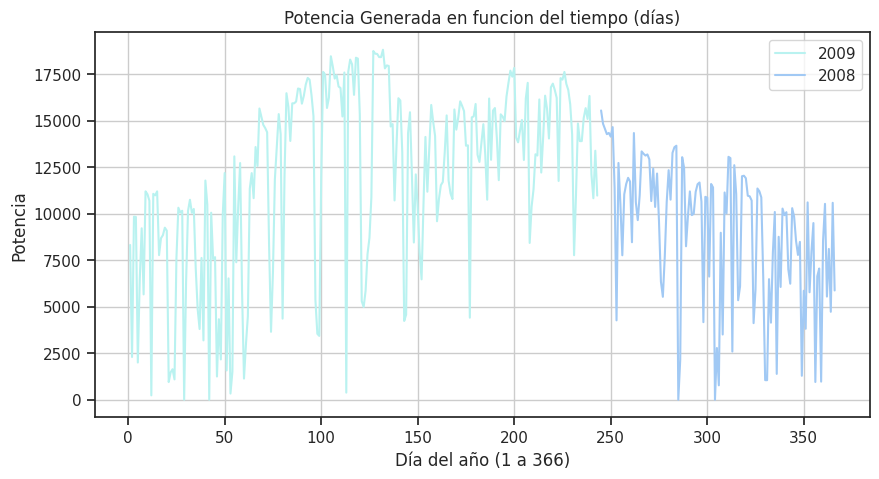

In [118]:
# Data for plotting
#separamos el detaset en los dos años para los que se recogieron los datos (2008 y 2009) 
# y calculamos la potencia media generada por mes:
df_DataSet2_avg_dia_2008 = df_DataSet2_dia.groupby('day_year').mean().query('year == 2008')
df_DataSet2_avg_dia_2009 = df_DataSet2_dia.groupby('day_year').mean().query('year == 2009')
avg_pot_dia_2008 = df_DataSet2_avg_dia_2008[['power_gen']]
df_DataSet2_dia_2008 = df_DataSet2_dia.query('year == 2008')
t_2008 = df_DataSet2_dia_2008['day_year'].unique()
avg_pot_dia_2009 = df_DataSet2_avg_dia_2009[['power_gen']]
df_DataSet2_dia_2009 = df_DataSet2_dia.query('year == 2009')
t_2009 = df_DataSet2_dia_2009['day_year'].unique()

# gráfica de la dinámica de la potencia en el tiempo (por día del año)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t_2009, avg_pot_dia_2009, "c", label = "2009")
plt.plot(t_2008, avg_pot_dia_2008, "b", label = "2008")
ax.set_title("Potencia Generada en funcion del tiempo (días)")
ax.set_xlabel("Día del año (1 a 366)")
ax.set_ylabel("Potencia")
ax.legend()
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/03_mpl_LinePlot_Pot.png')

#### Análisis de las variables climáticas

##### 1. Distribución de las variables climáticas

/tmp/ipykernel_4496/1262766606.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df_DataSet2_dia.iloc[:,6:15].hist(bins=50,ax=ax)


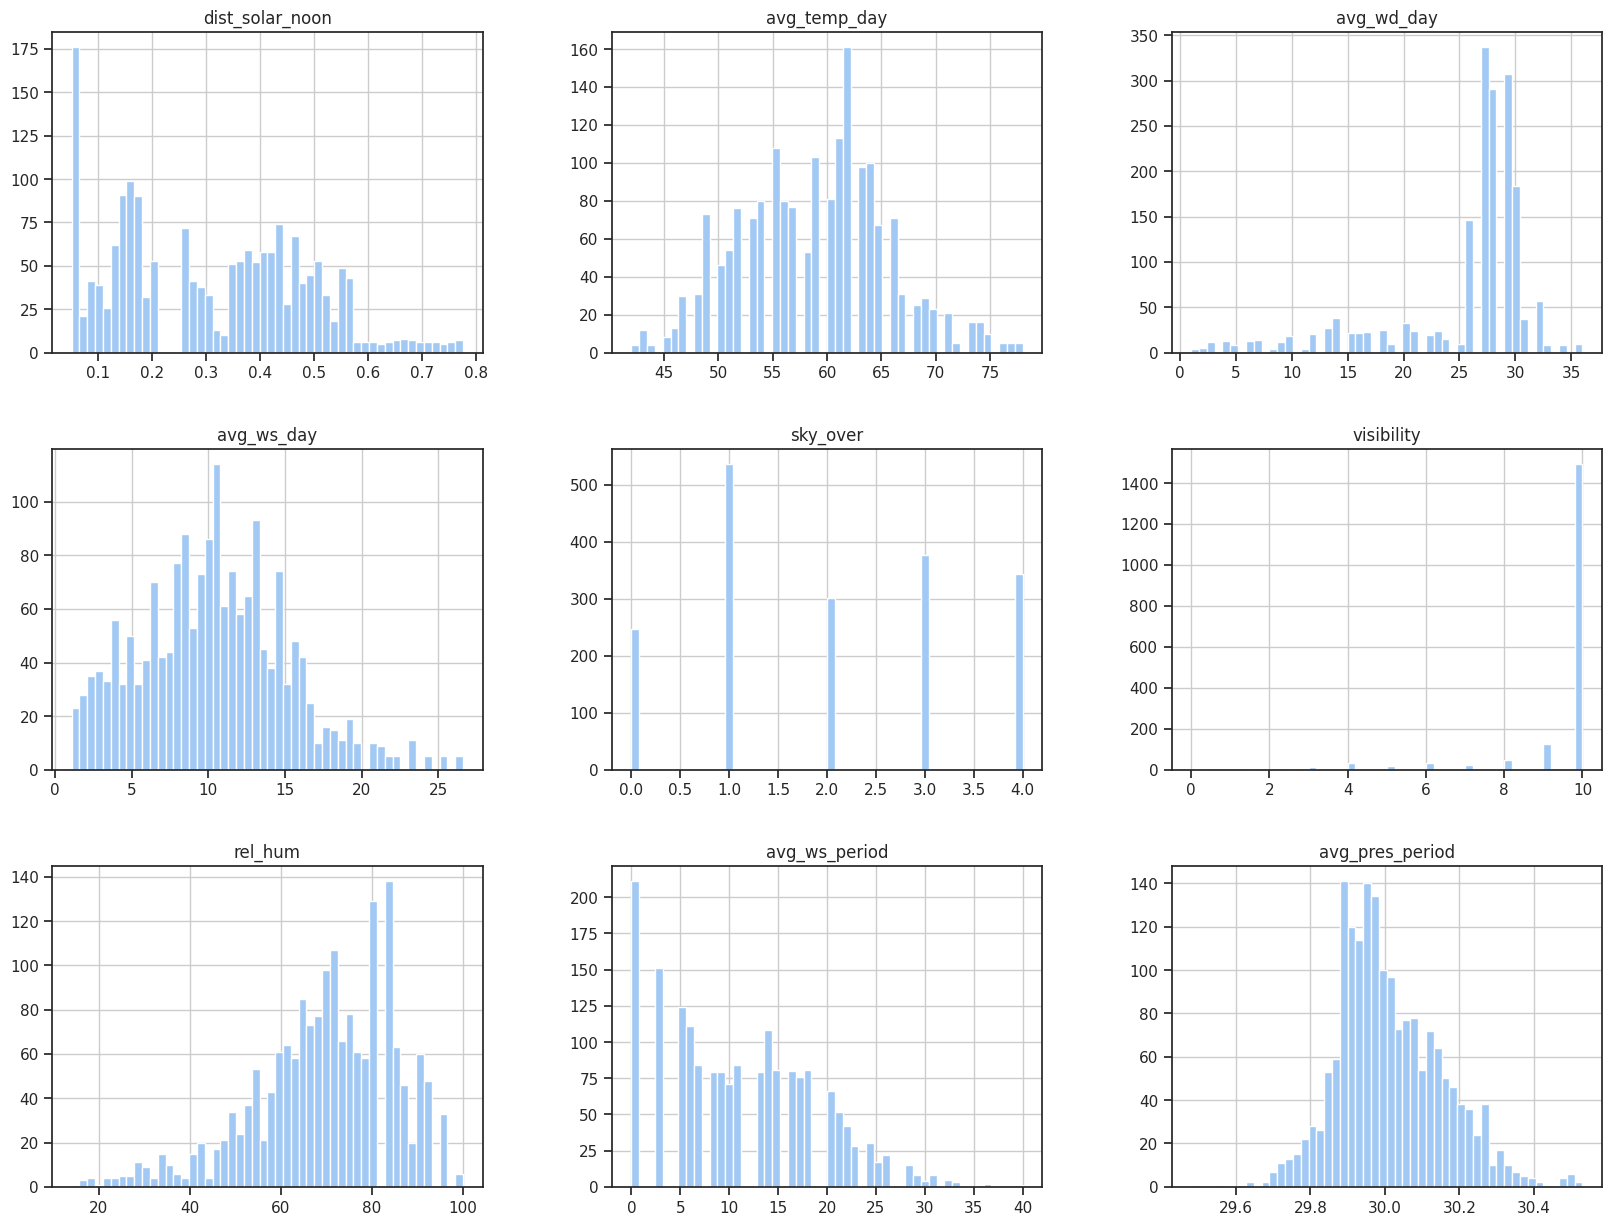

In [110]:
# estudiamos la distribución de cada una de las variables climáticas que nos podrían ser útiles (a priori) para 
# estimar la potencia generada. Para eso, hacemos un histograma de cada una de ellas.
fig, ax = plt.subplots(figsize=(20,15))
g = df_DataSet2_dia.iloc[:,6:15].hist(bins=50,ax=ax) 
#ax.set_title('Histograma de variables climáticas')
#ax.set_xlabel('Potencia')
#ax.set_ylabel('Cantidad de Muestras')
#ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/04_mpl_Hist_Var_Temp.png')

#### Correlación de las variables climáticas con la potencia generada


Para poder encontrar las variables que nos ayudarán a estimar la potencia generada, analizamos, como una primera aproximación, su correlación.

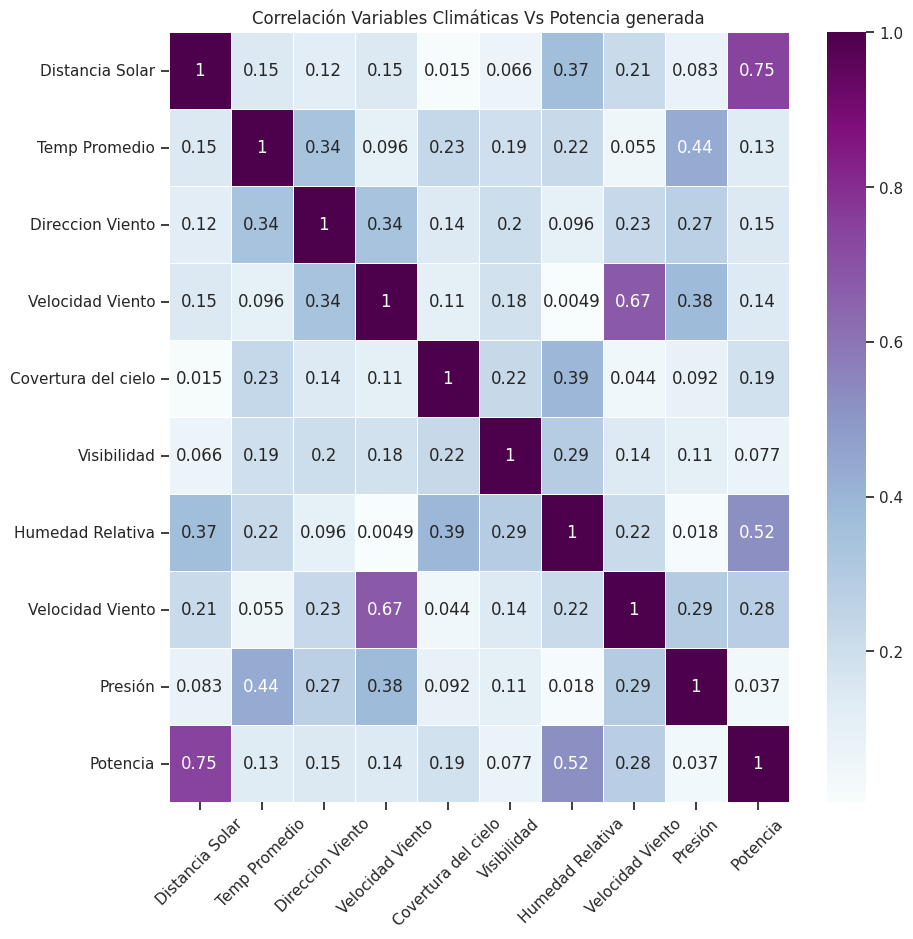

In [111]:
# Visualizamos la correlación de los datos (variables climáticas) con la potencia generada
fig1, ax = plt.subplots(figsize=(10, 10))
xticklabels = ["Distancia Solar","Temp Promedio", "Direccion Viento",  "Velocidad Viento", "Covertura del cielo", "Visibilidad", "Humedad Relativa", "Velocidad Viento", "Presión","Potencia"]
yticklabels = ["Distancia Solar","Temp Promedio", "Direccion Viento", "Velocidad Viento", "Covertura del cielo", "Visibilidad", "Humedad Relativa", "Velocidad Viento", "Presión","Potencia"]
g = sns.heatmap(df_DataSet2.iloc[:,6:16].corr().abs(), annot=True, linewidths=.5, ax=ax, xticklabels=xticklabels, yticklabels= yticklabels,cmap="BuPu")
ax.set_title('Correlación Variables Climáticas Vs Potencia generada')
ax.grid(True)
plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

fig.savefig('../Entregas Coder/Figuras/05_sn_Corr_Pot_Clima.png')

Podemos observar que la humedad relativa (correlación = 0.52) y la distancia al mediodía solar (correlación = 0.75) son las variables más correlacionadas con la potencia generada. Entre ellas, no se ve una fuerte correlación (0.37). Luego, es probable que ambas aporten a la potencia generada de manera independiente.

A continuación, haremos un scatterplot para mostrar en detalle la correlación entre las variables más correlacionadas y la potencia generada.

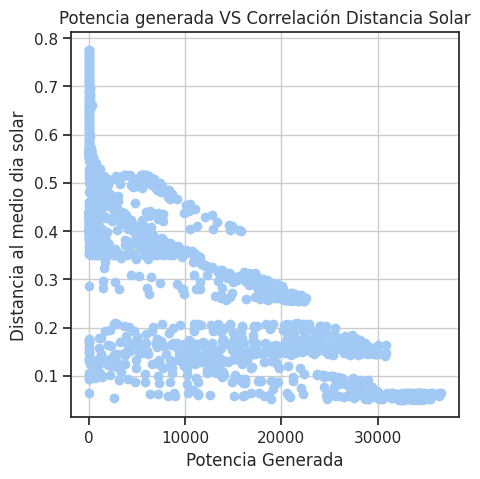

In [112]:
#Vamos a hacer un ScatterPlot con las variables con mayor correlación
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df_DataSet2_dia['power_gen'],df_DataSet2_dia['dist_solar_noon']) 
ax.set_title('Potencia generada VS Correlación Distancia Solar')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Distancia al medio dia solar")
ax.grid(True)
plt.show()

fig.savefig('../Entregas Coder/Figuras/05_mpl_Corr_Pot_Dist.png')

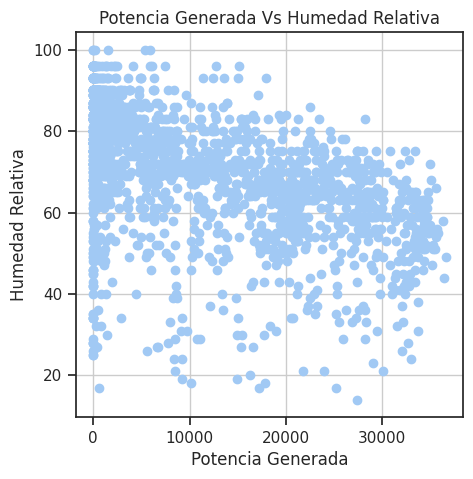

In [113]:
#Vamos a hacer un ScaterPlot con las variables con mayor correlación
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df_DataSet2_dia['power_gen'],df_DataSet2_dia['rel_hum']) 
ax.set_title('Potencia Generada Vs Humedad Relativa')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Humedad Relativa")
ax.grid(True)
plt.show()

fig.savefig('../Entregas Coder/Figuras/06_mpl_Corr_Pot_Hum.png')

Aunque su correlación no es muy significativa (0,28), graficaremos la correlación entre la velocidad del viento diaria y la potencia generada, ya que es la tercera en importancia.

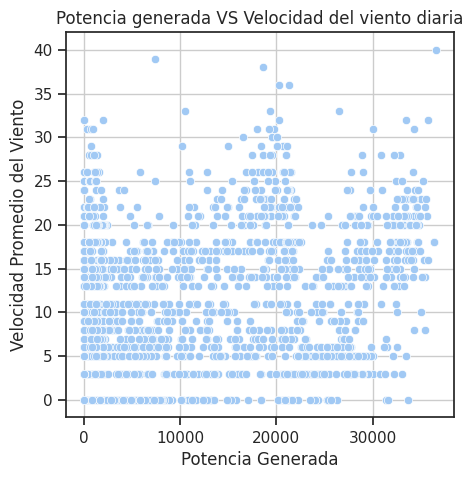

In [114]:
#Vamos a hacer un ScaterPlot con las variables con mayor correlación
fig, ax = plt.subplots(figsize=(5, 5))
#ax.scatter(df_DataSet2_dia['power_gen'],df_DataSet2_dia['avg_ws_period']) 
sns.scatterplot(data=df_DataSet2_dia, x="power_gen", y="avg_ws_period",ax=ax)
ax.set_title('Potencia generada VS Velocidad del viento diaria')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Velocidad Promedio del Viento")
ax.grid(True)
plt.show()

fig.savefig('../Entregas Coder/Figuras/07_sn_Corr_Pot_viento.png')